In [1]:
from rdflib import Graph, RDF, URIRef, Namespace
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
%matplotlib inline
import rdfextras
rdfextras.registerplugins()
import matplotlib_venn as mv

In [2]:
g = Graph()
g.parse("../graph/experiment_graph.ttl", format="turtle")
#g.parse("../test/translation_graph.ttl", format="turtle")
foaf = Namespace("http://xmlns.com/foaf/0.1/")
localNS = Namespace("http://deepweb.ut.ee/ontologies/api-network#")

In [3]:
ns = dict(api_network=localNS, cat= Namespace("http://www.programmableweb.com/category/"), 
          rdf = RDF, gr = Namespace("http://purl.org/goodrelations/v1#"), pw_api = Namespace("http://www.programmableweb.com/api/") )

In [4]:
#basic counts
print("Num of tripes "+str(len(g)))
print(str(len(list(g.subjects(RDF.type, localNS.API))))+" APIs")
print(str(len(list(g.subjects(RDF.type, foaf.OnlineAccount))))+" Users involved")
print(str(len(list(g.subjects(RDF.type, localNS.Mashup))))+" Mashups")
#distinct categories
categories = []
for i in g.objects(None, localNS.secondaryCategory):
    categories.append(i)
cat_np = np.array(categories)
unique = np.unique(cat_np)
unique.shape

Num of tripes 497734
14028 APIs
70328 Users involved
7692 Mashups


(461,)

([<matplotlib.axis.XTick at 0x7fa1bb93eba8>,
 <a list of 6 Text xticklabel objects>)

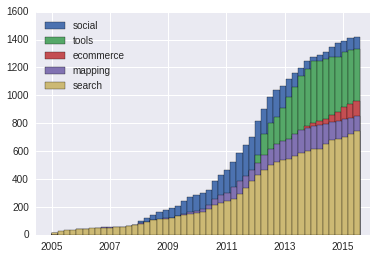

In [65]:
def get_data_by_category(category):
    rows = g.query("""SELECT ?s ?d WHERE {?s ?p api_network:API .
                                        ?s api_network:registrationDate ?d . 
                                        ?s api_network:primaryCategory|api_network:secondaryCategory cat:%s .}""" % category, initNs=ns)
    #print(len([t["?s"] for t in rows.bindings]))
    dates = [t["?d"] for t in rows.bindings]
    return [r.toPython() for r in dates]
categories = ["search", "mapping", "tools", "social", "ecommerce"]
dict_of_dates = {}
for cat in categories:
    dict_of_dates[cat]=get_data_by_category(cat)
#for key in dict_of_dates:
#    plt.hist(date2num(dict_of_dates[key]), cumulative=True, bins = 50, label = key)
plt.hist(date2num(dict_of_dates["social"]), cumulative=True, bins = 50, label = "social")
plt.hist(date2num(dict_of_dates["tools"]), cumulative=True, bins = 50, label = "tools")
plt.hist(date2num(dict_of_dates["ecommerce"]), cumulative=True, bins = 50, label = "ecommerce")
plt.hist(date2num(dict_of_dates["mapping"]), cumulative=True, bins = 50, label = "mapping")
plt.hist(date2num(dict_of_dates["search"]), cumulative=True, bins = 50, label = "search")

plt.legend(loc=2)
x=date2num(dict_of_dates["mapping"])
plt.xticks(np.arange(min(x), max(x)+1, (max(x)+1 - min(x))/5.3), ["2005", "2007", "2009", "2011", "2013", "2015"])
#def plot_kd(list_of_dates):
#    s = Series(date2num(list_of_dates))
#    xcol, ycol = sns.kdeplot(s, color = "w").get_lines().pop().get_data()
#    ycol=np.cumsum(ycol)
#    line, = plt.plot(xcol,ycol)
#    return line

In [8]:
#def get_data_by_protocol(protocol):
rows = g.query("""SELECT DISTINCT ?p WHERE {?s rdf:type api_network:API .
                                    ?s api_network:protocol ?p .}""", initNs=ns)
protocols = [p["?p"] for p in rows.bindings]

In [9]:
print("Examples of protocols:")
print(protocols[0:10])
print("Total number of distinct protocols:", len(protocols))

Examples of protocols:
[rdflib.term.Literal('JSON'), rdflib.term.Literal('REST'), rdflib.term.Literal('XML'), rdflib.term.Literal('SOAP'), rdflib.term.Literal('CSV'), rdflib.term.Literal('JSONP'), rdflib.term.Literal('YAML'), rdflib.term.Literal('SRU, OAI-PMH'), rdflib.term.Literal('HTTP'), rdflib.term.Literal('JavaScript')]
Total number of distinct protocols: 532


In [10]:
def get_dates_by_protocol(protocol):
    rows = g.query(""" SELECT ?d WHERE { ?s rdf:type api_network:API .
                        ?s api_network:registrationDate ?d .
                        ?s api_network:protocol "%s" . } """ % protocol, initNs = ns)
    dates = [t["?d"] for t in rows.bindings]
    return [r.toPython() for r in dates]
rest_dates = get_dates_by_protocol("REST")
soap_dates = get_dates_by_protocol("SOAP")
json_dates = get_dates_by_protocol("JSON")
http_dates = get_dates_by_protocol("HTTP")
xml_dates = get_dates_by_protocol("XML")

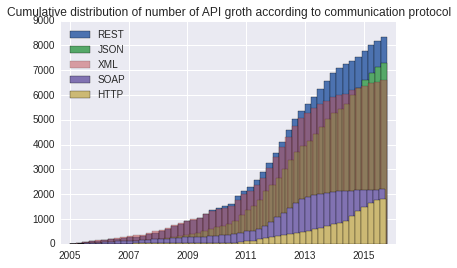

In [11]:
x = date2num(rest_dates)
plt.hist(date2num(rest_dates), cumulative=True, bins = 50, label = "REST")
plt.hist(date2num(json_dates), cumulative=True, bins = 50, label = "JSON")
plt.hist(date2num(xml_dates), cumulative=True, bins = 50, label = "XML", alpha=0.5)
plt.hist(date2num(soap_dates), cumulative=True, bins = 50, label = "SOAP")
plt.hist(date2num(http_dates), cumulative=True, bins = 50, label = "HTTP")
plt.xticks(np.arange(min(x), max(x)+1, (max(x)+1 - min(x))/5.4), ["2005", "2007", "2009", "2011", "2013", "2015"])
plt.legend(loc=2)
plt.title("Cumulative distribution of number of API groth according to communication protocol")

In [12]:
def get_services_by_category(category):
    rows = g.query("""SELECT ?s WHERE {?s ?p api_network:API .
                ?s api_network:primaryCategory|api_network:secondaryCategory cat:%s .}""" % category, initNs=ns)
    return [t["?s"] for t in rows.bindings]

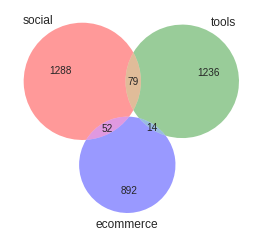

In [13]:
set1 = set(get_services_by_category("social"))
set2 = set(get_services_by_category("tools"))
set3 = set(get_services_by_category("ecommerce"))
mv.venn3([set1, set2, set3], ("social", "tools", "ecommerce"))

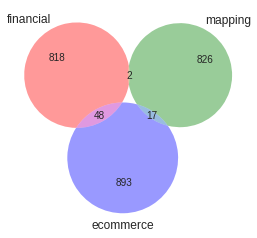

In [29]:
set1 = set(get_services_by_category("financial"))
set2 = set(get_services_by_category("mapping"))
set3 = set(get_services_by_category("ecommerce"))
mv.venn3([set1, set2, set3], ("financial", "mapping", "ecommerce"))

In [9]:
rows = g.query("""SELECT ?s ?d ?d1 WHERE {?s rdf:type api_network:API .
                ?s api_network:registrationDate ?d .
                ?m rdf:type api_network:Mashup .
                ?m gr:include ?s .
                ?m api_network:registrationDate ?d1 .
                }""", initNs=ns)
service = [t["?s"] for t in rows.bindings]
dates = [t["?d"].toPython() for t in rows.bindings]
activation_date = [t["?d1"].toPython() for t in rows.bindings]
ad = [np.datetime64(f) for f in activation_date]
d = [np.datetime64(m) for m in dates]
data = {"Activation date" : ad,
       "Registration date" : d,       
       "Service" : service}
sf = DataFrame(data)
groups = sf.groupby("Service")

In [10]:
s = []
d = []
for gr in groups:
    reg_date = gr[1].iloc[[0]]["Registration date"]
    rd = list(reg_date.items())[0][1]
    g = gr[1]
    df_with_positif_diff = g[g["Activation date"]>rd]   
    try:
        arg_min = df_with_positif_diff["Activation date"].argmin()    
        diff = sf.iloc[[arg_min]]["Activation date"] - sf.iloc[[arg_min]]["Registration date"]
        s.append(gr[0])
        d.append(diff[arg_min])
    except:
        pass
delay_data = DataFrame({"Service":s, "Activation time":d})

(array([ 429.,  174.,  120.,  102.,   69.,   63.,   60.,   49.,   42.,
          34.,   34.,   28.,   28.,   27.,   15.,   23.,   13.,   18.,
          11.,   15.,   15.,    3.,    9.,    6.,    6.,    2.,    2.,
           6.,    5.,    2.,    2.,    1.,    3.,    1.,    3.,    1.,
           1.,    0.,    0.,    1.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([  1.00000000e+00,   6.09400000e+01,   1.20880000e+02,
          1.80820000e+02,   2.40760000e+02,   3.00700000e+02,
          3.60640000e+02,   4.20580000e+02,   4.80520000e+02,
          5.40460000e+02,   6.00400000e+02,   6.60340000e+02,
          7.20280000e+02,   7.80220000e+02,   8.40160000e+02,
          9.00100000e+02,   9.60040000e+02,   1.01998000e+03,
          1.07992000e+03,   1.13986000e+03,   1.19980000e+03,
          1.25974000e+03,   1.31968000e+03,   1.37962000e+03,
          1.43956000e+03,   1.49950000e+03,   1.55944000e+03,
          1.61938000e+03,   1.67932000e+03

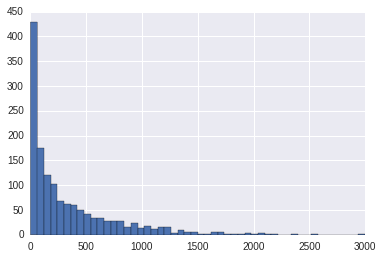

In [12]:
plt.hist((delay_data["Activation time"]).astype('timedelta64[D]'), bins=50)

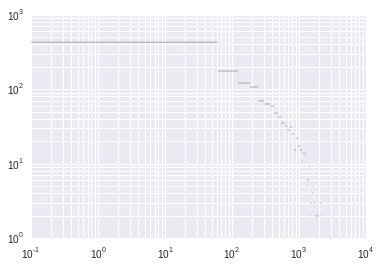

In [15]:
import pylab as pl
pl.hist((delay_data["Activation time"]).astype('timedelta64[D]'), bins=np.linspace(5, 3000, 50)) #bins=np.logspace(0.1, 4, 50)
pl.gca().set_xscale("log")
pl.gca().set_yscale("log")
pl.show()

In [106]:
# select most popular categories
def count_popular_categories():
    r = g.query("""SELECT ?c (COUNT(?c) as ?catCount) WHERE  {
                    ?s api_network:primaryCategory|api_network:secondaryCategory ?c .
                    }
                    GROUP BY ?c""", initNs=ns)
    frame = DataFrame()
    frame["Category"] = [t["?c"].toPython() for t in r.bindings]
    frame["Count"] = [t["?catCount"].toPython() for t in r.bindings]
    #frame = frame.sort("Count", ascending = 0)
    selected = frame[frame["Count"]>540]["Category"] #Series of top used categories
    return selected

In [109]:
selected = count_popular_categories()

In [108]:
# count number of transitions from given api category to given mashup category
def count_num_of_transitions(cat1, cat2):
    r = g.query("""SELECT ?s ?m WHERE { ?s ?p api_network:API .
                    ?m rdf:type api_network:Mashup .
                    ?m gr:include ?s .
                    ?s api_network:primaryCategory|api_network:secondaryCategory cat:%s. 
                    ?m api_network:tag cat:%s}""" % (cat1, cat2) , initNs=ns)
    return len(r)
count_num_of_transitions("mapping", "mapping")
#links = DataFrame()
#links["API"] = [t["?s"].toPython() for t in r.bindings]
#links["Mashup"] = [t["?m"].toPython() for t in r.bindings]

3508

In [142]:
diffusion_frame = DataFrame()
for api_cat in selected:
    for mashup_cat in selected:
        api_cat = api_cat.replace("http://www.programmableweb.com/category/", "")
        mashup_cat = mashup_cat.replace("http://www.programmableweb.com/category/", "")
        df = DataFrame([[api_cat, mashup_cat, count_num_of_transitions(api_cat, mashup_cat)]], columns = ["API Category", "Mashup Category", "Num of Transactions"])
        diffusion_frame = diffusion_frame.append(df, ignore_index=True)
        #count_num_of_transitions(api_cat.replace("http://www.programmableweb.com/category/", ""), mashup_cat.replace("http://www.programmableweb.com/category/", ""))        
        #print(api_cat.replace("http://www.programmableweb.com/category/", ""), mashup_cat.replace("http://www.programmableweb.com/category/", ""), "\n")

In [143]:
diffusion_frame = diffusion_frame.pivot("API Category", "Mashup Category", "Num of Transactions")

In [144]:
diffusion_frame

Mashup Category,data,ecommerce,enterprise,financial,government,mapping,marketing,messaging,mobile,payments,reference,search,social,telephony,tools
API Category,,,,,,,,,,,,,,,
data,11,3,0,1,0,18,1,2,1,0,4,21,13,1,3
ecommerce,3,897,2,10,2,187,4,34,43,21,69,368,156,12,27
enterprise,2,18,61,8,1,26,9,15,10,0,12,38,64,6,24
financial,0,23,8,35,3,11,4,8,7,20,9,23,16,6,7
government,7,4,3,19,79,48,5,4,7,0,15,9,9,4,4
mapping,17,217,21,28,121,3508,6,77,126,0,238,456,433,35,100
marketing,0,8,1,0,0,4,6,16,5,0,7,6,9,4,12
messaging,1,30,5,10,2,32,4,314,224,3,28,45,97,111,20
mobile,1,25,3,9,3,138,1,105,157,1,23,84,146,15,21


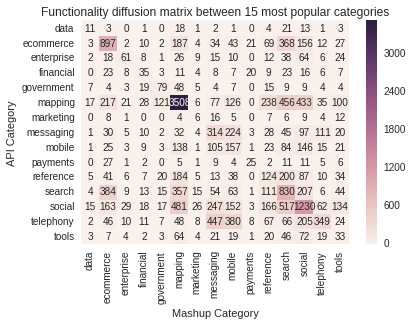

In [157]:
ax = plt.axes()
sns.heatmap(diffusion_frame, annot=True, fmt='d') #, center = diffusion_frame.loc["reference", "reference"]
ax.set_title('Functionality diffusion matrix between 15 most popular categories')
plt.show()